In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate

In [3]:
path = Path('/home/ubuntu/Database')

In [4]:
path.ls()

[PosixPath('/home/ubuntu/Database/GoodPLR_0.404_7581.jpg'),
 PosixPath('/home/ubuntu/Database/GoodPLR_0.433_2440.jpg'),
 PosixPath('/home/ubuntu/Database/GoodPLR_0.352_5594.jpg'),
 PosixPath('/home/ubuntu/Database/GoodPLR_0.46_5072.jpg'),
 PosixPath('/home/ubuntu/Database/GoodPLR_0.37_914.jpg'),
 PosixPath('/home/ubuntu/Database/GoodPLR_0.404_840.jpg'),
 PosixPath('/home/ubuntu/Database/GoodPLR_0.404_9135.jpg'),
 PosixPath('/home/ubuntu/Database/GoodPLR_0.509_6291.jpg'),
 PosixPath('/home/ubuntu/Database/GoodPLR_0.389_3233.jpg'),
 PosixPath('/home/ubuntu/Database/GoodPLR_0.46_1675.jpg'),
 PosixPath('/home/ubuntu/Database/GoodPLR_0.391_4683.jpg'),
 PosixPath('/home/ubuntu/Database/GoodPLR_0.439_7106.jpg'),
 PosixPath('/home/ubuntu/Database/GoodPLR_0.442_3577.jpg'),
 PosixPath('/home/ubuntu/Database/GoodPLR_0.259_2725.jpg'),
 PosixPath('/home/ubuntu/Database/GoodPLR_0.463_3786.jpg'),
 PosixPath('/home/ubuntu/Database/GoodPLR_0.52_3953.jpg'),
 PosixPath('/home/ubuntu/Database/GoodPLR_0.43

In [5]:
fnames = get_image_files(path)
fnames[:5]

[PosixPath('/home/ubuntu/Database/GoodPLR_0.404_7581.jpg'),
 PosixPath('/home/ubuntu/Database/GoodPLR_0.433_2440.jpg'),
 PosixPath('/home/ubuntu/Database/GoodPLR_0.352_5594.jpg'),
 PosixPath('/home/ubuntu/Database/GoodPLR_0.46_5072.jpg'),
 PosixPath('/home/ubuntu/Database/GoodPLR_0.37_914.jpg')]

In [6]:
#pat = r'/([^/]+)_\d+.jpg$'
def get_float_labels(y):
    return y.parts[-1].split('_')[1]
# I need this to pull out the middle value #
    




In [7]:
data = (ImageItemList.from_folder(path)
 .random_split_by_pct()
 .label_from_func(get_float_labels, label_cls=FloatList)
 .transform(get_transforms(), size=224)
 .databunch()) 
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (152 items)
x: ImageItemList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: FloatList
0.404,0.433,0.352,0.46,0.37
Path: /home/ubuntu/Database;

Valid: LabelList (37 items)
x: ImageItemList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: FloatList
0.345,0.463,0.345,0.238,0.421
Path: /home/ubuntu/Database;

Test: None

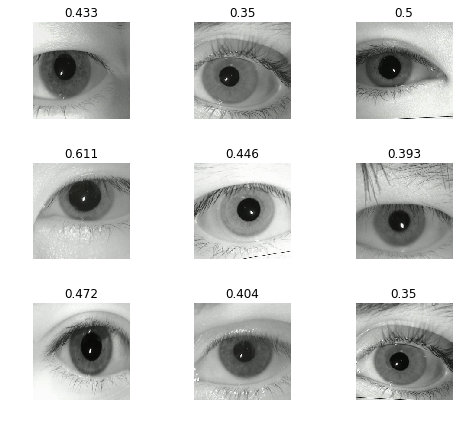

In [8]:
data.show_batch(rows=3, figsize=(7,6))

In [9]:
learn = create_cnn(data, models.resnet34)

In [10]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [11]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss
1,1.351833,0.570074
2,1.351142,0.183185
3,1.267859,0.408966
4,1.324509,0.470339


In [12]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


In [ ]:
learn.recorder.plot()

In [ ]:
learn.save('PLRstage1')

In [ ]:
import os, random

In [ ]:
randomchoice = random.choice(os.listdir("/home/ubuntu/Database/"))
randomchoice

In [ ]:
img = open_image('/home/ubuntu/Database/'+randomchoice)
img

In [ ]:
log_preds = learn.predict(img)

In [ ]:
log_preds[0]